### We look at the state transitions during the testing

In [1]:
from openpyxl import load_workbook

from astropy.time import Time
from datetime import timedelta, datetime
from lsst_efd_client import EfdClient

import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
plt.jet()

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
start = Time('2020-03-02T00:00:00') #this is UTC
end = Time('2020-03-06T23:59:00') 

In [3]:
client = EfdClient('summit_efd')
csc_index = 1

In [4]:
#known bug, M2 sends utc everywhere.
df = await client.select_time_series('lsst.sal.MTM2.logevent_summaryState', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df.head()

,priority,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp,summaryState
2020-03-02 12:40:36.733059822+00:00,0,1,1.583153e+09,144799,1.583153e+09,d3ffb0cb,0,1.583153e+09,5
2020-03-02 12:40:36.733063439+00:00,0,1,1.583153e+09,144799,1.583153e+09,d3ffb0cb,1,1.583153e+09,1
2020-03-02 12:40:36.733066464+00:00,0,1,1.583153e+09,144799,1.583153e+09,d3ffb0cb,2,1.583153e+09,5
2020-03-02 12:40:36.733069286+00:00,0,1,1.583153e+09,144799,1.583153e+09,d3ffb0cb,3,1.583153e+09,4
2020-03-02 12:41:55.578619918+00:00,0,1,1.583153e+09,144799,1.583153e+09,d3ffb0cb,4,1.583153e+09,4


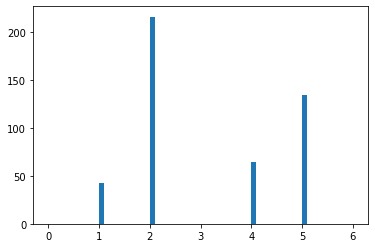

In [5]:
mybin = np.linspace(0, 6, 61)
plt.hist(df.summaryState, mybin);

* diagnostic/standby = 1, 
* enable =2, 
* fault = 3,
* offline = 4,
* standby=5


In [6]:
#known bug, M2 sends utc everywhere.
df = await client.select_time_series('lsst.sal.MTM2.logevent_m2AssemblyInPosition', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df.head()

,inPosition,priority,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp
2020-03-03 14:34:02.130404894+00:00,True,0,1,1.583246e+09,56244,1.583246e+09,9c71cd13,186757,1.583246e+09
2020-03-03 14:34:02.194133470+00:00,False,0,1,1.583246e+09,56244,1.583246e+09,9c71cd13,186776,1.583246e+09
2020-03-03 14:34:03.449071566+00:00,True,0,1,1.583246e+09,56244,1.583246e+09,9c71cd13,187014,1.583246e+09
2020-03-03 14:34:03.622588346+00:00,False,0,1,1.583246e+09,56244,1.583246e+09,9c71cd13,187043,1.583246e+09
2020-03-03 14:34:03.744053982+00:00,True,0,1,1.583246e+09,56244,1.583246e+09,9c71cd13,187064,1.583246e+09


In [7]:
len(df)

96600

In [12]:
np.sum(df.inPosition)

48307

In [14]:
np.sum(df.inPosition == False)

48293

In [15]:
#known bug, M2 sends utc everywhere.
df = await client.select_time_series('lsst.sal.MTM2.logevent_errorCode', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df.head()

,errorCode,errorReport,priority,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp,traceback
2020-03-02 12:52:46.642428071+00:00,1,test,1,1,1.583154e+09,145461,1.583154e+09,43371e9b,0,1.583154e+09,test
2020-03-02 12:52:57.683718563+00:00,1,test,1,1,1.583154e+09,145514,1.583154e+09,43371e9b,0,1.583154e+09,test
2020-03-02 13:20:08.472415999+00:00,6071,Single Breaker Trip,0,1,1.583155e+09,146843,1.583155e+09,43371e9b,3,1.583155e+09,
2020-03-02 13:20:08.477742708+00:00,0,Unknown reason why the error code data structu...,0,1,1.583155e+09,146843,1.583155e+09,43371e9b,4,1.583155e+09,
2020-03-02 13:20:08.477756185+00:00,0,Unknown reason why the error code data structu...,0,1,1.583155e+09,146843,1.583155e+09,43371e9b,5,1.583155e+09,


In [18]:
np.unique(df.errorCode)

array([   0,    1, 6051, 6052, 6054, 6055, 6056, 6057, 6067, 6071, 6075,
       6083, 6084, 6088])

In [38]:
aa = df.errorCode
for i in np.unique(aa):
    idx = np.argmax(aa==i)
    print('%4d, 1st occurred: %s, %s'%(i, pd.to_datetime(df.private_sndStamp[idx], unit='s').strftime('%h-%d %H:%M'), 
                                       df.errorReport[idx]))

   0, 1st occurred: Mar-02 13:20, Unknown reason why the error code data structure has not been initialized.
   1, 1st occurred: Mar-02 12:52, test
6051, 1st occurred: Mar-02 13:20, Actuator ILC Read Error
6052, 1st occurred: Mar-02 13:20, Monitoring ILC Read Error
6054, 1st occurred: Mar-02 13:20, ILC State Transition Error
6055, 1st occurred: Mar-05 17:48, Excessive Force Detected
6056, 1st occurred: Mar-04 15:28, Actuator Limit Switch Triggered [Closed-loop]
6057, 1st occurred: Mar-04 15:28, Actuator Limit Switch Triggered [Open-loop]
6067, 1st occurred: Mar-02 13:20, Power Relay Opening Fault
6071, 1st occurred: Mar-02 13:20, Single Breaker Trip
6075, 1st occurred: Mar-03 23:11, Excessive Cell Temperature Differential
6083, 1st occurred: Mar-05 18:12, Axial Actuator Encoder Out of Range
6084, 1st occurred: Mar-05 18:31, Tangent Actuator Encoder Out of Range
6088, 1st occurred: Mar-02 13:20, Tangent Load Cell Fault


In [42]:
#known bug, M2 sends utc everywhere.
df = await client.select_time_series('lsst.sal.MTM2.logevent_appliedSettingsMatchStart', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df.head()

,appliedSettingsMatchStartIsTrue,priority,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp
2020-03-02 13:20:07.100075560+00:00,True,0,1,1.583155e+09,146843,1.583155e+09,433782ac,2,1.583155e+09
2020-03-02 14:00:58.354721598+00:00,True,0,1,1.583158e+09,1487,1.583158e+09,433782ac,2,1.583158e+09
2020-03-02 18:12:50.405706082+00:00,True,0,1,1.583173e+09,11784,1.583173e+09,433782ac,2,1.583173e+09
2020-03-02 19:16:54.377304063+00:00,True,0,1,1.583177e+09,15960,1.583177e+09,433782ac,1,1.583177e+09
2020-03-03 14:16:56.756971053+00:00,True,0,1,1.583245e+09,56244,1.583245e+09,433782ac,1,1.583245e+09


In [40]:
len(df)

16

In [43]:
for i in range(len(df)):
    print('%2d, %s, %s'%(i, pd.to_datetime(df.private_sndStamp[i], unit='s').strftime('%h-%d %H:%M'), 
                                       df.appliedSettingsMatchStartIsTrue[i]))

 0, Mar-02 13:20, True
 1, Mar-02 14:00, True
 2, Mar-02 18:12, True
 3, Mar-02 19:16, True
 4, Mar-03 14:16, True
 5, Mar-03 15:30, True
 6, Mar-03 16:48, True
 7, Mar-03 18:20, True
 8, Mar-03 19:22, True
 9, Mar-03 19:26, True
10, Mar-03 20:02, True
11, Mar-04 12:22, True
12, Mar-04 14:42, True
13, Mar-05 13:45, True
14, Mar-06 12:49, True
15, Mar-06 14:27, True
